In [12]:
%matplotlib inline
import datetime
import pandas as pd

In [13]:
df = pd.read_csv("data/reactions.csv", parse_dates=['Reaction At'])

In [14]:
# Add a trivial numeric column to aggregate on below (when we run the cumulative sum)
df['num'] = 1

In [15]:
reactions_by_issue_and_day = df.groupby(['Issue Title', 'Reaction At']).sum()

In [16]:
# We have a lot of missing (issue, date) rows with no data, but to plot
# the data over time we need to include the missing dates. This fills in
# zeros at each missing (issue, date) record. 
# 🙏to Eric Ness: https://medium.com/when-i-work-data/using-pandas-multiindex-from-product-to-fill-in-missing-data-43c3cfe9cf39
issues = reactions_by_issue_and_day.index.unique(level='Issue Title')

date_range = pd.date_range(
    start=df['Reaction At'].min(),
    end=df['Reaction At'].max(),
)

issue_date_index = (
    pd.MultiIndex
    .from_product(
        iterables=[issues, date_range],
        names=['Issue Title', 'Date']
    )
)

reactions_by_issue_and_day = reactions_by_issue_and_day.reindex(issue_date_index, fill_value=0)

# Cumulative Sum of Reactions for Top 5 Issues

In [17]:
# Calculate the cumulative sum of issue reactions over time
reactions_by_issue_and_day['cumsum'] = (
    reactions_by_issue_and_day
    .reindex()
    .groupby('Issue Title')
    .cumsum()
)

In [18]:
# Pivot the data in a format that will let us plot dates on the X axis 
# with the cumulative sum of each issue over time plotted as its own line
reactions_by_issue_and_day = reactions_by_issue_and_day.reset_index()

# Plot just the top 5 issues
top_5_issues = reactions_by_issue_and_day.groupby('Issue Title')['num'].sum().sort_values(ascending=False)[:5].index.tolist()

plot_df = reactions_by_issue_and_day[reactions_by_issue_and_day['Issue Title'].isin(top_5_issues)].pivot(index='Date', columns='Issue Title', values='cumsum')

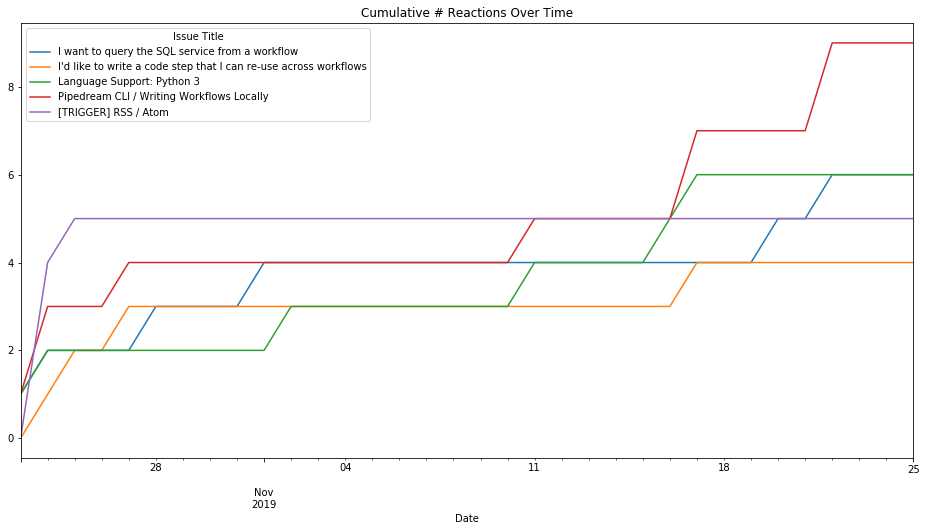

In [19]:
plot_df.plot(title="Cumulative # Reactions Over Time", figsize=(16, 8))

# # Reactions to Issues Over Time

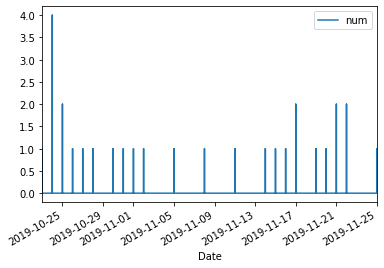

In [21]:
reactions_by_issue_and_day.plot(x='Date', y='num')